[Open to colab](https://colab.research.google.com/drive/1FrAXdceVXoZi_c3jfTp0_Bp6-wSTf_Qu?usp=sharing#scrollTo=_qlkkRCenrHQ)

Connecting google colab notebook to google drive

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive






Importing neccessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data and cleaning the data

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/prjct/train.csv")
pd.set_option('max_columns', None)

In [ ]:
train.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,395,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,13,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,8,Roundabout,40,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,13,Single carriageway,30,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,24,Dual carriageway,30,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom


In [ ]:
train.shape

(478741, 27)

In [ ]:
train.isnull().sum()

Accident_ID                                      0
Police_Force                                     0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                            14
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control                0
Pedestrian_Crossing-Physical_Facilities          0
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions        

Lets remove the nulls , we have a lot of rows of data for training so now we are just removing the rows that have null values

In [ ]:
train.dropna(axis=0,inplace=True)

In [ ]:
train.isnull().sum()

Accident_ID                                    0
Police_Force                                   0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_a

In [ ]:
train.dtypes

Accident_ID                                     int64
Police_Force                                    int64
Number_of_Vehicles                              int64
Number_of_Casualties                            int64
Date                                           object
Day_of_Week                                     int64
Time                                           object
Local_Authority_(District)                      int64
Local_Authority_(Highway)                      object
1st_Road_Class                                  int64
1st_Road_Number                                 int64
Road_Type                                      object
Speed_limit                                     int64
2nd_Road_Class                                  int64
2nd_Road_Number                                 int64
Pedestrian_Crossing-Human_Control              object
Pedestrian_Crossing-Physical_Facilities        object
Light_Conditions                               object
Weather_Conditions          

Date, Time column should have date-time datatype not object so lets change them to datetime.



In [ ]:
def change_Date_and_time(data):
  data.loc[:,"Date"]=pd.to_datetime(data.loc[:,"Date"],format="%d/%m/%y")
  data.loc[:,"day_in_month"]=data.loc[:,"Date"].dt.day
  data.loc[:,"month_in_year"]=data.loc[:,"Date"].dt.month
  data.loc[:,"year"]=data.loc[:,"Date"].dt.year
  data.drop("Date",axis=1,inplace=True)
  data.loc[:,"Time"]=pd.to_datetime(data.loc[:,"Time"],format="%H:%M")
  data.loc[:,"Time"]=data.loc[:,"Time"].round("H")
  data.loc[:,"time of the day"]=data.loc[:,"Time"].dt.hour
  data.drop("Time",axis=1,inplace=True)
  


In [ ]:
change_Date_and_time(train)

In [ ]:
train.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,day_in_month,month_in_year,year,time of the day
0,1,34,2,1,7,344,E10000032,4,395,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,19,12,2012,13
1,2,5,2,1,4,102,E09000026,3,13,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom,2,11,2012,8
2,3,1,2,1,4,531,E10000016,6,8,Roundabout,40,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom,2,11,2012,16
3,4,1,1,1,1,7,E08000035,6,13,Single carriageway,30,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom,6,5,2012,17
4,5,46,1,1,3,519,E10000031,3,24,Dual carriageway,30,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom,30,6,2012,13


In [ ]:
train.Number_of_Casualties.unique()

array([1, 3, 2, 4, 5])

In [ ]:
train.nunique()

Accident_ID                                    478212
Police_Force                                       66
Number_of_Vehicles                                  4
Number_of_Casualties                                5
Day_of_Week                                         7
Local_Authority_(District)                        880
Local_Authority_(Highway)                         207
1st_Road_Class                                      5
1st_Road_Number                                  5463
Road_Type                                           6
Speed_limit                                         6
2nd_Road_Class                                      5
2nd_Road_Number                                     1
Pedestrian_Crossing-Human_Control                   3
Pedestrian_Crossing-Physical_Facilities             6
Light_Conditions                                    5
Weather_Conditions                                  9
Road_Surface_Conditions                             5
Special_Conditions_at_Site  

"2nd_Road_Number" , "country" , "year" columns have only one unique value so we are droping them because they dnt have any info.

In [ ]:


train.drop(["2nd_Road_Number" , "country" , "year" ],axis=1,inplace=True)

In [ ]:
train.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,day_in_month,month_in_year,time of the day
0,1,34,2,1,7,344,E10000032,4,395,Single carriageway,30,-1,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,19,12,13
1,2,5,2,1,4,102,E09000026,3,13,One way street,30,-1,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,2,11,8
2,3,1,2,1,4,531,E10000016,6,8,Roundabout,40,6,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,2,11,16
3,4,1,1,1,1,7,E08000035,6,13,Single carriageway,30,6,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,6,5,17
4,5,46,1,1,3,519,E10000031,3,24,Dual carriageway,30,6,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,30,6,13


In [ ]:
train.dtypes

Accident_ID                                     int64
Police_Force                                    int64
Number_of_Vehicles                              int64
Number_of_Casualties                            int64
Day_of_Week                                     int64
Local_Authority_(District)                      int64
Local_Authority_(Highway)                      object
1st_Road_Class                                  int64
1st_Road_Number                                 int64
Road_Type                                      object
Speed_limit                                     int64
2nd_Road_Class                                  int64
Pedestrian_Crossing-Human_Control              object
Pedestrian_Crossing-Physical_Facilities        object
Light_Conditions                               object
Weather_Conditions                             object
Road_Surface_Conditions                        object
Special_Conditions_at_Site                     object
Carriageway_Hazards         

Now we will split the dataset into two parts, 1st will have the object type columns and 2nd one is numeric type

In [ ]:
object_cols=list(train.columns[train.dtypes=="object"])
object_cols

['Local_Authority_(Highway)',
 'Road_Type',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'state',
 'postcode']

In [ ]:
numeric_cols=list(train.columns[train.dtypes=="int64"])
numeric_cols

['Accident_ID',
 'Police_Force',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Speed_limit',
 '2nd_Road_Class',
 'Urban_or_Rural_Area',
 'day_in_month',
 'month_in_year',
 'time of the day']

In [ ]:
df_object=train.loc[:,object_cols]
df_numeric=train.loc[:,numeric_cols]

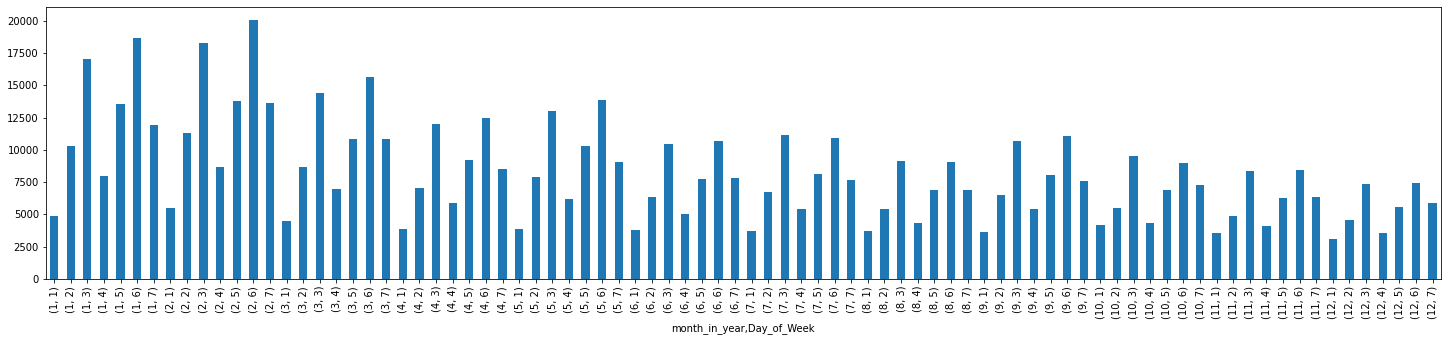

In [ ]:
plt.figure(figsize=(25,5))
df_numeric.groupby(["month_in_year","Day_of_Week"]).Number_of_Casualties.sum().plot.bar()


Day 3 in month 1 , Day 3 in month 12 have very different number of accidents, so i am thinking to change the values of week days according to month values


In [ ]:
a=df_numeric.groupby(["month_in_year","Day_of_Week"]).Accident_ID.count()
a

month_in_year  Day_of_Week
1              1               3316
               2               6990
               3              11416
               4               5389
               5               9134
                              ...  
12             3               5110
               4               2486
               5               3842
               6               5204
               7               4131
Name: Accident_ID, Length: 84, dtype: int64

In [ ]:
def change_week_values(row):
  return a[row.loc["month_in_year"],row.loc["Day_of_Week"]]
df_numeric.loc[:,"changed_week_days"]=df_numeric.apply(change_week_values,axis=1)

In [ ]:
df_numeric.loc[:,"changed_week_days"]=(df_numeric.loc[:,"changed_week_days"]-df_numeric.loc[:,"changed_week_days"].mean())/df_numeric.loc[:,"changed_week_days"].std()

In [ ]:
df_numeric.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,Urban_or_Rural_Area,day_in_month,month_in_year,time of the day,changed_week_days
0,1,34,2,1,7,344,4,395,30,-1,1,19,12,13,-0.957240
1,2,5,2,1,4,102,3,13,30,-1,1,2,11,8,-1.426183
2,3,1,2,1,4,531,6,8,40,6,1,2,11,16,-1.426183
3,4,1,1,1,1,7,6,13,30,6,1,6,5,17,-1.484178
4,5,46,1,1,3,519,3,24,30,6,1,30,6,13,0.116917


In [ ]:
df_numeric.loc[:,"changed_week_days"]

0        -0.957240
1        -1.426183
2        -1.426183
3        -1.484178
4         0.116917
            ...   
478736    0.253544
478737   -0.509645
478738    0.911060
478739   -1.091376
478740    0.601871
Name: changed_week_days, Length: 478212, dtype: float64

In [ ]:
df_numeric.changed_week_days

0        -0.957240
1        -1.426183
2        -1.426183
3        -1.484178
4         0.116917
            ...   
478736    0.253544
478737   -0.509645
478738    0.911060
478739   -1.091376
478740    0.601871
Name: changed_week_days, Length: 478212, dtype: float64

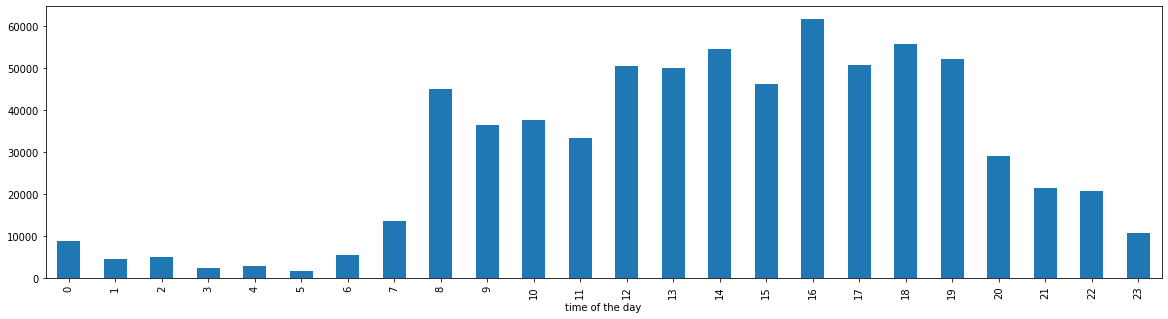

In [ ]:
plt.figure(figsize=(20,5))
df_numeric.groupby(["time of the day"]).Number_of_Casualties.sum().plot.bar()

In [ ]:


def classify_the_time(row):
  if row["time of the day"]>=0 and row["time of the day"]<8:
    return 1 
  elif row["time of the day"]>=8 and row["time of the day"]<20:
    return 2
  else:
    return 3

df_numeric.loc[:,"time of the day"]=df_numeric.apply(classify_the_time,axis=1)

In [ ]:
cols1=['Number_of_Vehicles','1st_Road_Class','Speed_limit', '2nd_Road_Class','Urban_or_Rural_Area','month_in_year']


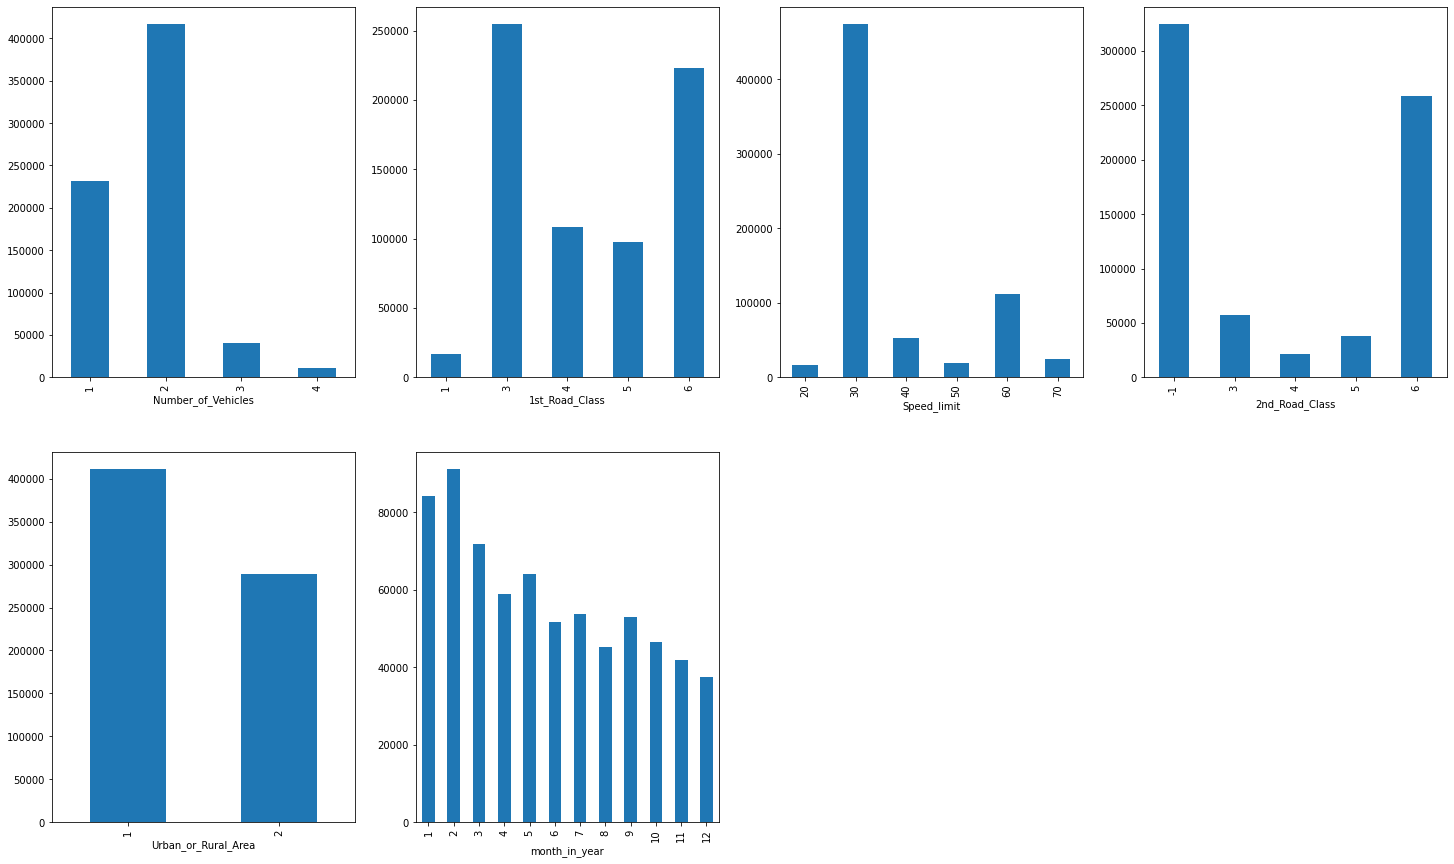

In [ ]:
plt.figure(figsize=(25,15))
a=0
for i in range(1,7):
  ax=plt.subplot(2,4,i)
  df_numeric.groupby(cols1[a]).Number_of_Casualties.sum().plot.bar()
  plt.xlabel(cols1[a])
  a=a+1

In [ ]:
df_numeric.drop("Accident_ID",axis=1,inplace=True)

In [ ]:
df_object.drop("postcode",axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder()
df_object[df_object.columns]=ord.fit_transform(df_object[df_object.columns])

In [ ]:
df_object.head()

,Local_Authority_(Highway),Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,state
0,150.0,3.0,2.0,2.0,4.0,1.0,0.0,4.0,3.0,1.0,2.0
1,117.0,1.0,2.0,2.0,4.0,5.0,0.0,3.0,3.0,0.0,2.0
2,136.0,2.0,2.0,4.0,4.0,1.0,0.0,3.0,3.0,0.0,2.0
3,90.0,3.0,2.0,2.0,4.0,1.0,0.0,7.0,3.0,1.0,2.0
4,149.0,0.0,2.0,4.0,4.0,1.0,0.0,3.0,3.0,0.0,2.0


In [ ]:
cols2=list(df_object.columns)

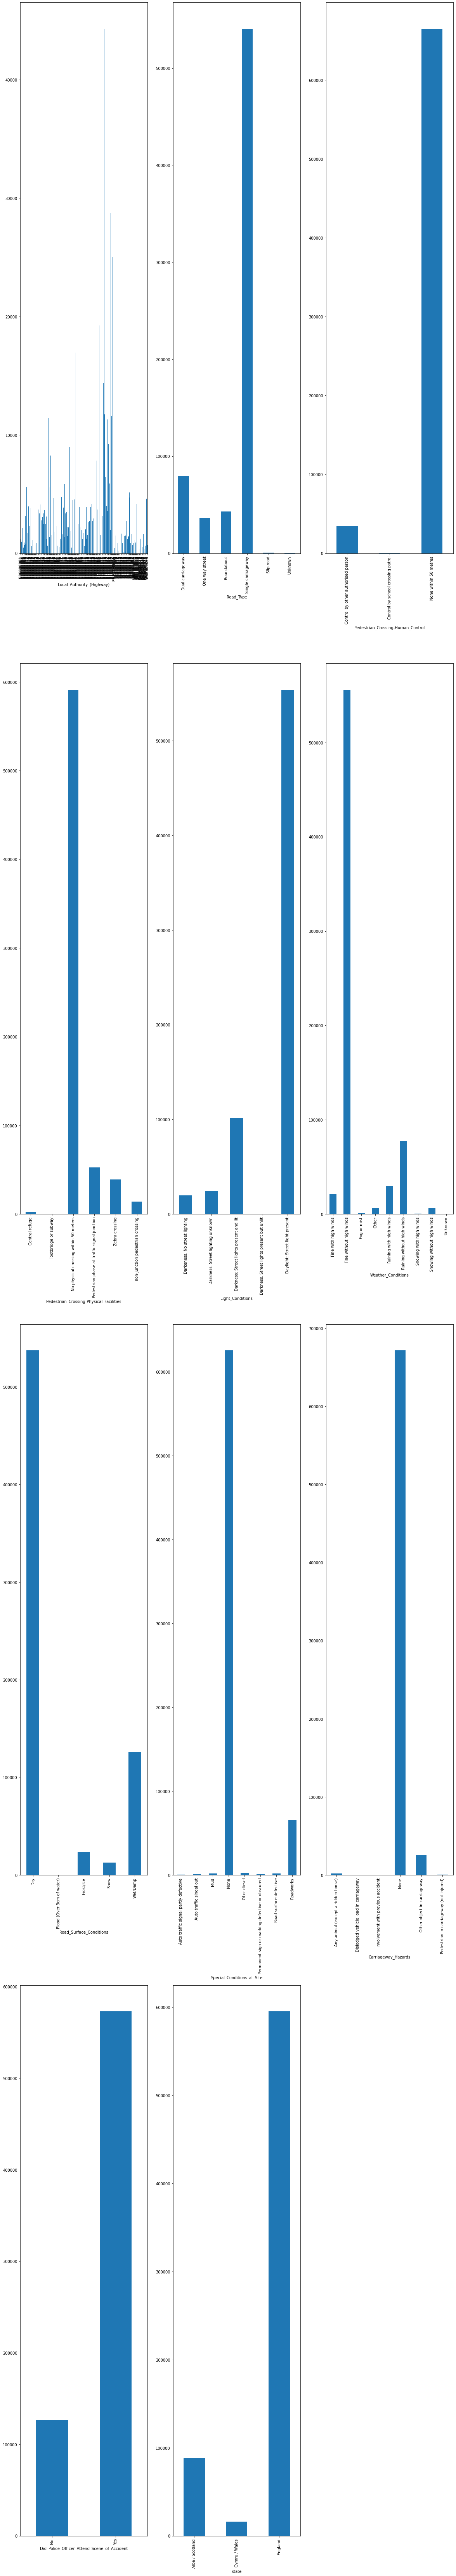

In [ ]:
plt.figure(figsize=(20,120))
a=0
for i in range(1,12):
  plt.subplot(4,3,i)
  train.groupby(cols2[a]).Number_of_Casualties.sum().plot.bar()
  a=a+1



In [ ]:
df_train=pd.concat([df_numeric,df_object],axis=1)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df_train.shape

(478212, 25)

In [ ]:
y=df_train.pop("Number_of_Casualties")

In [ ]:
mi_score=mutual_info_classif(df_train,y,discrete_features=[True for i in range(24) ])
mi_score=pd.Series(mi_score,name="MI_Score",index=df_train.columns)
mi_score.sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


1st_Road_Number                                0.021793
Local_Authority_(District)                     0.010768
Police_Force                                   0.008569
Local_Authority_(Highway)                      0.001908
1st_Road_Class                                 0.001899
2nd_Road_Class                                 0.001802
Speed_limit                                    0.001773
Number_of_Vehicles                             0.001749
changed_week_days                              0.000976
Urban_or_Rural_Area                            0.000933
Road_Type                                      0.000649
month_in_year                                  0.000588
Light_Conditions                               0.000490
state                                          0.000320
day_in_month                                   0.000317
Road_Surface_Conditions                        0.000305
Pedestrian_Crossing-Physical_Facilities        0.000176
Weather_Conditions                             0

In [ ]:
mi_score.values

array([8.56872335e-03, 1.74864462e-03, 1.30118719e-04, 1.07683615e-02,
       1.89941181e-03, 2.17933081e-02, 1.77262927e-03, 1.80247762e-03,
       9.32974128e-04, 3.17193634e-04, 5.87681099e-04, 5.31043510e-05,
       9.76305621e-04, 1.90759986e-03, 6.48906222e-04, 1.94543591e-05,
       1.75932790e-04, 4.89853920e-04, 1.48886636e-04, 3.04596637e-04,
       6.23611496e-05, 2.73979257e-05, 1.31065448e-04, 3.19768318e-04])

In [ ]:
filtered_cols=list(mi_score[mi_score>0.00031].index)
filtered_cols

['Police_Force',
 'Number_of_Vehicles',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Speed_limit',
 '2nd_Road_Class',
 'Urban_or_Rural_Area',
 'day_in_month',
 'month_in_year',
 'changed_week_days',
 'Local_Authority_(Highway)',
 'Road_Type',
 'Light_Conditions',
 'state']

In [ ]:
filtered_cols.append("1st_Road_Number")
filtered_cols.append("Local_Authority_(District)")

In [ ]:
df_train=df_train.loc[:,filtered_cols]

In [ ]:
df_train.head()

,Police_Force,Number_of_Vehicles,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,Urban_or_Rural_Area,day_in_month,month_in_year,changed_week_days,Local_Authority_(Highway),Road_Type,Light_Conditions,state,1st_Road_Number,Local_Authority_(District)
0,34,2,344,4,395,30,-1,1,19,12,-0.957240,150.0,3.0,4.0,2.0,395,344
1,5,2,102,3,13,30,-1,1,2,11,-1.426183,117.0,1.0,4.0,2.0,13,102
2,1,2,531,6,8,40,6,1,2,11,-1.426183,136.0,2.0,4.0,2.0,8,531
3,1,1,7,6,13,30,6,1,6,5,-1.484178,90.0,3.0,4.0,2.0,13,7
4,46,1,519,3,24,30,6,1,30,6,0.116917,149.0,0.0,4.0,2.0,24,519


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_train,y,test_size=0.2,random_state=1)


In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((382569, 17), (95643, 17), (382569,), (95643,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid={"max_depth":range(5,15)}
tree_mdl=DecisionTreeRegressor()
Grid_search=GridSearchCV(tree_mdl,param_grid,verbose=3,scoring="neg_mean_absolute_error")
Grid_search.fit(df_train,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ......................max_depth=5;, score=-0.628 total time=   2.0s
[CV 2/5] END ......................max_depth=5;, score=-0.629 total time=   2.1s
[CV 3/5] END ......................max_depth=5;, score=-0.631 total time=   2.2s
[CV 4/5] END ......................max_depth=5;, score=-0.632 total time=   2.0s
[CV 5/5] END ......................max_depth=5;, score=-0.628 total time=   1.4s
[CV 1/5] END ......................max_depth=6;, score=-0.627 total time=   1.6s
[CV 2/5] END ......................max_depth=6;, score=-0.629 total time=   1.6s
[CV 3/5] END ......................max_depth=6;, score=-0.630 total time=   1.6s
[CV 4/5] END ......................max_depth=6;, score=-0.631 total time=   1.6s
[CV 5/5] END ......................max_depth=6;, score=-0.627 total time=   1.6s
[CV 1/5] END ......................max_depth=7;, score=-0.627 total time=   1.8s
[CV 2/5] END ......................max_depth=7;,

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(5, 15)},
             scoring='neg_mean_absolute_error', verbose=3)

In [ ]:

tree_model=DecisionTreeRegressor(max_depth=6,splitter="best",criterion="squared_error",random_state=1)
tree_model.fit(X_train,Y_train)
y_predict=tree_model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("root_mean_squared_error:",np.sqrt(mean_squared_error(Y_train,y_predict)))
r2_score_train=r2_score(Y_train,y_predict)
print("r2_score:",r2_score_train)
Adj_r2 = 1 - (1-r2_score_train)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
print("Adj_r2:",Adj_r2)

root_mean_squared_error: 0.809483645823335
r2_score: 0.01434746138191667
Adj_r2: 0.014303660442547717


In [ ]:
test_predict=tree_model.predict(X_test)

In [ ]:
print("root_mean_squared_error:",np.sqrt(mean_squared_error(Y_test,test_predict)))
r2_score_test=r2_score(Y_test,test_predict)
print("r2_score:",r2_score_test)
Adj_r2_test = 1 - (1-r2_score_test)*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
print("Adj_r2:",Adj_r2_test)

root_mean_squared_error: 0.8132356154010209
r2_score: 0.01291911806014645
Adj_r2: 0.012743637014468234


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rd_model=RandomForestRegressor(n_estimators=90,criterion="squared_error",max_depth=9)
rd_model.fit(X_train,Y_train)
y_predict=rd_model.predict(X_train)

In [ ]:
print("root_mean_squared_error:",np.sqrt(mean_squared_error(Y_train,y_predict)))
r2_score_train=r2_score(Y_train,y_predict)
print("r2_score:",r2_score_train)
Adj_r2 = 1 - (1-r2_score_train)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
print("Adj_r2:",Adj_r2)

root_mean_squared_error: 0.8037462350905705
r2_score: 0.028270046632351775
Adj_r2: 0.02822686439205635


In [ ]:
test_predict=rd_model.predict(X_test)

In [ ]:
print("root_mean_squared_error:",np.sqrt(mean_squared_error(Y_test,test_predict)))
r2_score_test=r2_score(Y_test,test_predict)
print("r2_score:",r2_score_test)
Adj_r2_test = 1 - (1-r2_score_test)*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
print("Adj_r2:",Adj_r2_test)

root_mean_squared_error: 0.8122133683857505
r2_score: 0.015399103634418765
Adj_r2: 0.015224063475064886


In [ ]:
dict1={"n_estimators":range(80,100),
       "r2_score_train":[],
       "r2_score_test":[]}
for i in dict1["n_estimators"]:
  model=RandomForestRegressor(max_depth=6,n_estimators=i,criterion="squared_error",random_state=1)
  model.fit(X_train,Y_train)
  y_pred=model.predict(X_train)
  test_pred=model.predict(X_test)
  dict1["r2_score_train"]+=[r2_score(Y_train,y_pred)]
  dict1["r2_score_test"]+=[r2_score(Y_test,test_pred)]


In [ ]:
dict1

{'n_estimators': range(80, 100),
 'r2_score_test': [0.01466333059402769,
  0.014664181607387028,
  0.01466268002287685,
  0.014656599226603118,
  0.014652580649093916,
  0.014657531493751819,
  0.014658379460333881,
  0.014657491783588994,
  0.014665620676829416,
  0.01467165996636799,
  0.014675944445257438,
  0.014669969307031572,
  0.014669170865378778,
  0.01466382400395183,
  0.014661480080954359,
  0.01466239883996856,
  0.01466283067438312,
  0.01466144673179659,
  0.014656915872694465,
  0.014654909660332005],
 'r2_score_train': [0.015724669428330174,
  0.01572334339372461,
  0.015720083011120045,
  0.01572010602251861,
  0.015721521477443323,
  0.015723550785431306,
  0.01572001365696296,
  0.015714109706393198,
  0.01571899683765987,
  0.01571606803687975,
  0.015710524535839765,
  0.01571200270490547,
  0.01570856948438415,
  0.015705462135274684,
  0.015702843632913188,
  0.01569903409130502,
  0.01569696936887166,
  0.015702837809371872,
  0.015704795341465627,
  0.0157013

In [ ]:
import plotly.express as px

In [ ]:

df_n=pd.DataFrame(dict1)
fig=px.line(df_n,x='n_estimators',y=["r2_score_train","r2_score_test"],title="train_acc ,test_acc vs n_estimators")
fig.update_layout(title="train_acc ,test_acc vs n_estimators",title_x=0.5,xaxis_title='n_estimators',yaxis_title='Accuracy')
fig['layout']['title']['font']=dict(size=26)
fig.show()

In [ ]:
dict2={"max_depth":range(4,15),
       "r2_score_train":[],
       "r2_score_test":[]}
for i in dict2["max_depth"]:
  model=RandomForestRegressor(max_depth=i,n_estimators=95,criterion="squared_error",random_state=1)
  model.fit(X_train,Y_train)
  y_pred=model.predict(X_train)
  test_pred=model.predict(X_test)
  dict2["r2_score_train"]+=[r2_score(Y_train,y_pred)]
  dict2["r2_score_test"]+=[r2_score(Y_test,test_pred)]

In [ ]:
df_n=pd.DataFrame(dict2)
fig=px.line(df_n,x='max_depth',y=["r2_score_train","r2_score_test"],title="train_acc ,test_acc vs n_estimators")
fig.update_layout(title="train_acc ,test_acc vs n_estimators",title_x=0.5,xaxis_title='n_estimators',yaxis_title='Accuracy')
fig['layout']['title']['font']=dict(size=26)
fig.show()

In [ ]:
print("root_mean_squared_error:",np.sqrt(mean_squared_error(Y_train,y_predict)))
r2_score_train=r2_score(Y_train,y_predict)
print("r2_score:",r2_score_train)
Adj_r2 = 1 - (1-r2_score_train)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
print("Adj_r2:",Adj_r2)

root_mean_squared_error: 0.8037462350905705
r2_score: 0.028270046632351775
Adj_r2: 0.02822686439205635


In [ ]:
print("root_mean_squared_error:",np.sqrt(mean_squared_error(Y_test,test_predict)))
r2_score_test=r2_score(Y_test,test_predict)
print("r2_score:",r2_score_test)
Adj_r2_test = 1 - (1-r2_score_test)*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
print("Adj_r2:",Adj_r2_test)

root_mean_squared_error: 0.8122133683857505
r2_score: 0.015399103634418765
Adj_r2: 0.015224063475064886


In [ ]:
test=pd.read_csv("/content/drive/MyDrive/prjct/test.csv")
test.head()

In [ ]:
test.loc[:,"Time"]=test.loc[:,"Time"].fillna(test["Time"].mode()[0])
test.loc[:,"Road_Surface_Conditions"]=test.loc[:,"Road_Surface_Conditions"].fillna(test["Road_Surface_Conditions"].mode()[0])
test.loc[:,"Special_Conditions_at_Site"]=test.loc[:,"Special_Conditions_at_Site"].fillna(test["Special_Conditions_at_Site"].mode()[0])

In [ ]:
df1=test.copy()

In [ ]:
test[df_object.columns]=ord.transform(test[df_object.columns])

In [ ]:
change_Date_and_time(test)

In [ ]:

test.head()

In [ ]:
b=test.groupby(["month_in_year","Day_of_Week"]).Accident_ID.count()
b

In [ ]:
def change_test_week_values(row):
  return b[row.loc["month_in_year"],row.loc["Day_of_Week"]]
test.loc[:,"changed_week_days"]=test.apply(change_test_week_values,axis=1)

In [ ]:
test.loc[:,"changed_week_days"]=(test.loc[:,"changed_week_days"]-test.loc[:,"changed_week_days"].mean())/test.loc[:,"changed_week_days"].std()

In [ ]:
test.loc[:,"changed_week_days"]

In [ ]:
test.head()

In [ ]:
test=test.loc[:,df_train.columns]

In [ ]:
test.head()

In [ ]:
test.shape

In [ ]:
test_predictions=tree_model.predict(test)

In [ ]:
test_predictions_rd=rd_model.predict(test)

In [ ]:
test["Casualties"]=test_predictions_rd

In [ ]:
postcode=list(df1.groupby("postcode").postcode.count().index)
test.loc[:,"Accident_ID"]=df1.Accident_ID
test.loc[:,"postcode"]=df1.postcode

In [ ]:
AQI=test.groupby("postcode").Casualties.sum()/test.groupby("postcode").Accident_ID.count()

In [ ]:
sub_df=pd.DataFrame({"postcode":postcode,"Accident_risk_index":AQI.values})

In [ ]:
sub_df.head()

In [ ]:
sub_df.to_csv("submission25.csv",index=False)